In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [61]:
# EL Reclassification Data
df = pd.read_csv('filesreclass.csv', sep='\t')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CDS       10193 non-null  float64
 1   County    10193 non-null  object 
 2   District  10193 non-null  object 
 3   School    10193 non-null  object 
 4   EL        10193 non-null  float64
 5   FEP       10193 non-null  float64
 6   Reclass   10194 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 557.6+ KB


In [62]:
# We see what the shape of the csv looks like
df.shape

(10194, 7)

In [63]:
unique_languages = df['Reclass'].unique()
count_unique_languages = len(unique_languages)
sum_unique_languages = unique_languages.sum()

print(f"Number of unique Reclass: {count_unique_languages}")
print(f"Sum of unique Reclass: {sum_unique_languages}")

Number of unique Reclass: 90
Sum of unique Reclass: 84095


In [64]:
county_counts = df[['County', 'District', 'School', 'EL', 'FEP', 'Reclass']].value_counts()

county_counts

County          District                            School                                      EL     FEP    Reclass
Alameda         Alameda County Office of Education  Alameda County Community                    28.0   17.0   0          1
San Bernardino  San Bernardino City Unified         Public Safety Academy                       85.0   178.0  0          1
                                                    Oehl Elementary                             112.0  65.0   3          1
                                                    Options for Youth-San Bernardino            98.0   225.0  7          1
                                                    Paakuma K-8                                 53.0   87.0   2          1
                                                                                                                        ..
Los Angeles     Los Angeles Unified                 TEACH Tech Charter High                     83.0   129.0  0          1
                     

In [65]:
df.columns

Index(['CDS', 'County', 'District', 'School', 'EL', 'FEP', 'Reclass'], dtype='object')

In [66]:
# We want to find out how many missing values there are and sum up the amount of missing values. 
df.isnull().sum()

CDS         1
County      1
District    1
School      1
EL          1
FEP         1
Reclass     0
dtype: int64

In [19]:
# # We will drop any rows where we have missing values.
# df=df.dropna(subset=['SchoolCode','DistrictName','SchoolName',
#                      'DistrictCode'])
# # You will notice that the shape has changed after we drop the missing values.
# print(df.shape)

In [ ]:
# Assuming 'column_name' is the name of the column containing values like '40,,,,,'
# Replace 'column_name' with the actual name of your column.
df['TOTAL_EL,,,,,'] = df['TOTAL_EL,,,,,'].str.split(',').str[0]

# This will remove the extra colons and any characters after the first colon.

# If you want to convert the result to integers, you can do this:
# df['column_name'] = df['column_name'].astype(int)

In [68]:
# Converting objects'String Values' into integers
label_encoders = {}
columns_to_encode = ['County', 'District', 'School', 'EL', 'FEP', 'Reclass']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [69]:
# our x value will measure the following columns
X = df[['County', 'District', 'School', 'EL', 'FEP']].values
X

array([[   0,    5, 2450,   68,  121],
       [   0,    5, 1630,  131,   37],
       [   0,    5, 8574,   48,  132],
       ...,
       [  57,  953, 2266,    6,    6],
       [  57,  953, 8336,   30,  112],
       [  58,  981, 8611,  543,  901]], dtype=int64)

In [70]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X.astype(float))

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# If you want to use StandardScaler:
# scaler = StandardScaler()

# If you want to use MinMaxScaler to scale your data to the [0, 1] range:
scaler = MinMaxScaler()

X = scaler.fit_transform(X.astype(float))


# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[0.        , 0.00509684, 0.2845198 , 0.1252302 , 0.13429523],
       [0.        , 0.00509684, 0.18929277, 0.2412523 , 0.04106548],
       [0.        , 0.00509684, 0.99570317, 0.08839779, 0.14650388],
       [0.        , 0.00509684, 0.91522471, 0.1160221 , 0.0199778 ],
       [0.        , 0.00509684, 0.28463593, 0.        , 0.        ]])

In [72]:
# Our Y value will measure if the candidates were approved in advance. 
y = df['Reclass'].values
y [0:5]

array([15,  3,  0,  2,  1], dtype=int64)

In [73]:
# We will setup our training and testing for the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6626, 5) (6626,)
Test set: (3568, 5) (3568,)


In [74]:
#Generating a model with K=5
#Import k-nearest neighbors classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn=KNeighborsClassifier(n_neighbors=19)

#Train the model using the training sets
knn.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=knn.predict(X_test)

In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.26681614349775784


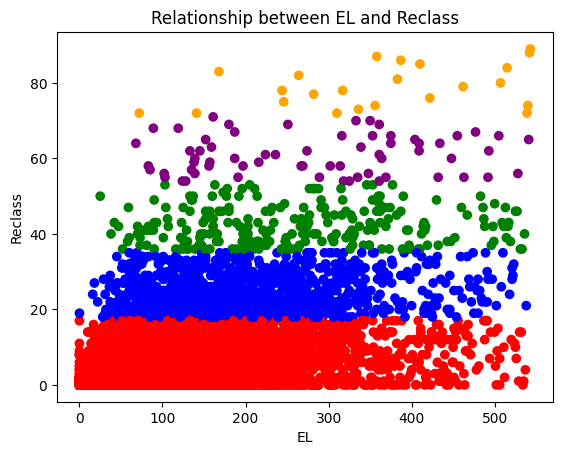

In [76]:
# from matplotlib.colors import ListedColormap
# import numpy as np
# import matplotlib.pyplot as plt

# plt.scatter(df['EL'], df['Reclass'])
# plt.title('Relationship between LANGUAGE and TOTAL_EL')
# plt.xlabel('LANGUAGE')
# plt.ylabel('TOTAL_EL')
# plt.show()

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Create a colormap with a unique color for each category (Reclass)
cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange'])  # You can add more colors as needed

plt.scatter(df['EL'], df['Reclass'], c=df['Reclass'], cmap=cmap)
plt.title('Relationship between EL and Reclass')
plt.xlabel('EL')
plt.ylabel('Reclass')
plt.show()

In [54]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_housing=PCA(n_components=2)
principalComponents_housing=pca_housing.fit_transform(X)

In [55]:
principal_housing_DF=pd.DataFrame(data=principalComponents_housing, columns=['principal component1', 'principal component2' ])

In [56]:
principal_housing_DF.head()

,principal component1,principal component2
0,0.647372,0.314292
1,0.709802,0.241456
2,0.170987,0.835724
3,0.220958,0.773209
4,0.640630,0.311330


In [57]:
print('Explained variation per principal component: {}'.format(pca_housing.explained_variance_ratio_))

Explained variation per principal component: [0.32176514 0.25348104]


<Figure size 640x480 with 0 Axes>

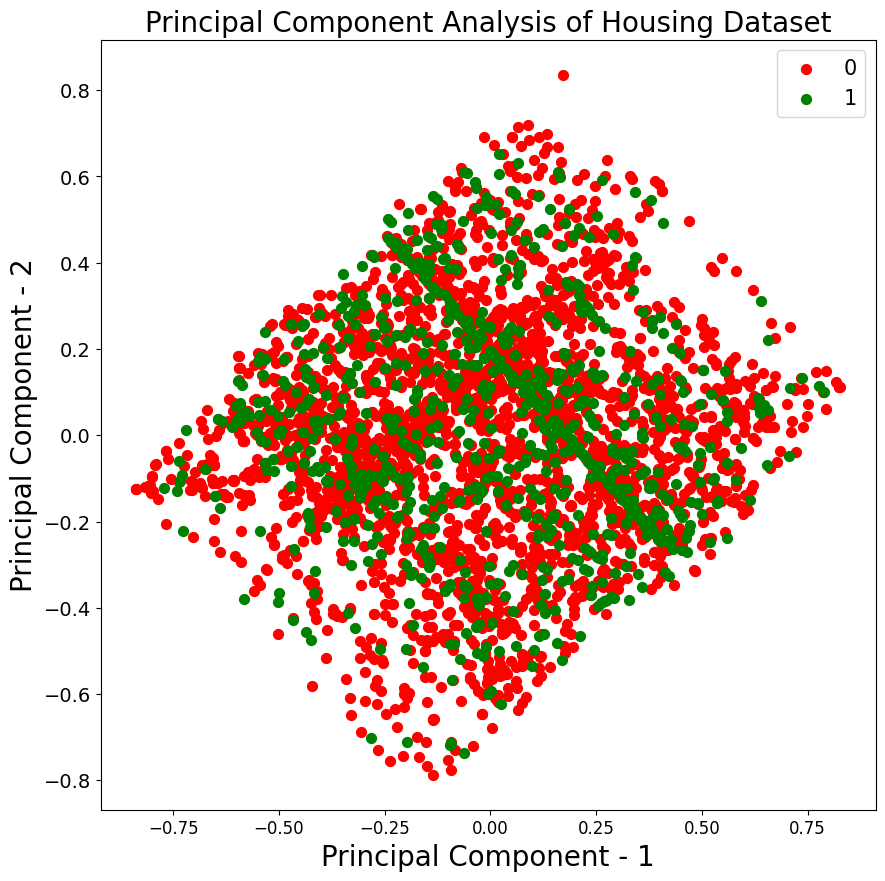

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Housing Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Reclass'] == target
    plt.scatter(principal_housing_DF.loc[indicesToKeep, 'principal component1']
               , principal_housing_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})